In [2]:
# Análisis de GRB - 3 Bandas de Energía
# Destello: bn166509374 (del ejemplo)
# Detector: n0 (NaI)
# Bandas: 8-50 keV, 50-300 keV, 300-900 keV
print("=== ANÁLISIS DE GRB CON 3 BANDAS DE ENERGÍA ===")

=== ANÁLISIS DE GRB CON 3 BANDAS DE ENERGÍA ===


In [3]:
from gbm import test_data_dir
from gbm.data import Cspec
import matplotlib.pyplot as plt
import numpy as np
print("✅ Paquetes importados")

✅ Paquetes importados


In [4]:
print("=== DESTELLO bn090131090 ===")
print("=== DETECTOR n9 ===")

=== DESTELLO bn090131090 ===
=== DETECTOR n9 ===


In [5]:
from gbm import test_data_dir
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time

# open a TTE file
tte = TTE.open(test_data_dir+'/glg_tte_n9_bn090131090_v00.fit')
# bin to 1.024 s resolution, reference time is trigger time
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

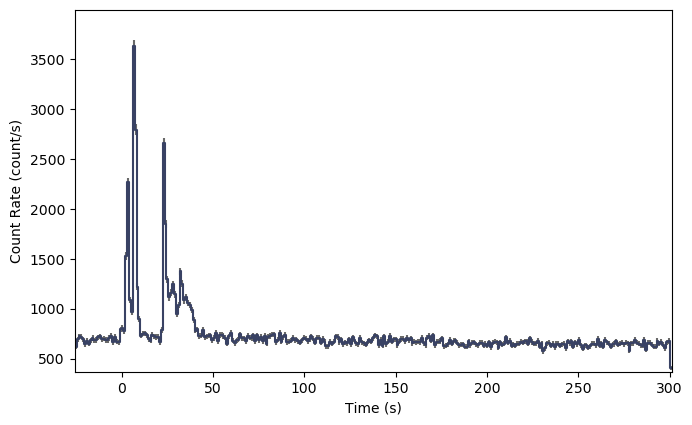

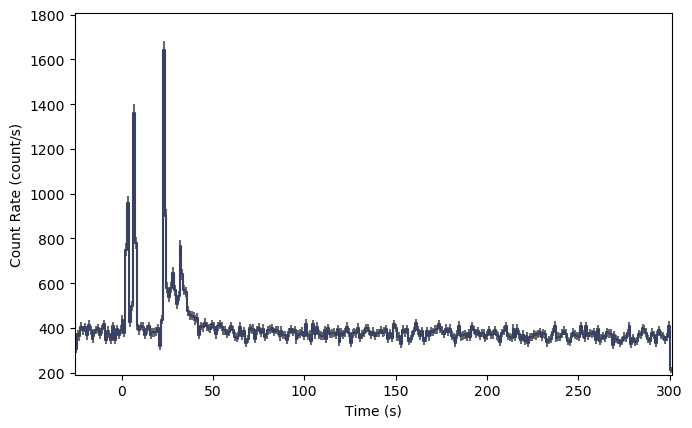

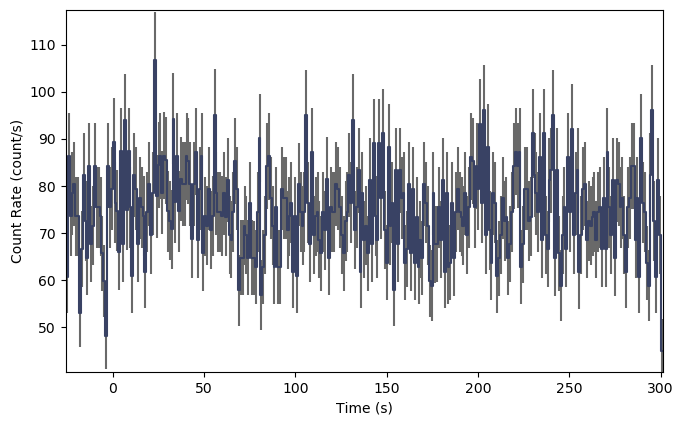

In [6]:
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum
import matplotlib.pyplot as plt

#definimos nuestras 3 bandas de energia
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

#curvas de luz
lc_data1 = phaii.to_lightcurve(energy_range=erange1)  
lc_data2 = phaii.to_lightcurve(energy_range=erange2)
lc_data3 = phaii.to_lightcurve(energy_range=erange3)

# Lightcurve
lcplot1 = Lightcurve(data=lc_data1)
lcplot2 = Lightcurve(data=lc_data2) 
lcplot3 = Lightcurve(data=lc_data3)


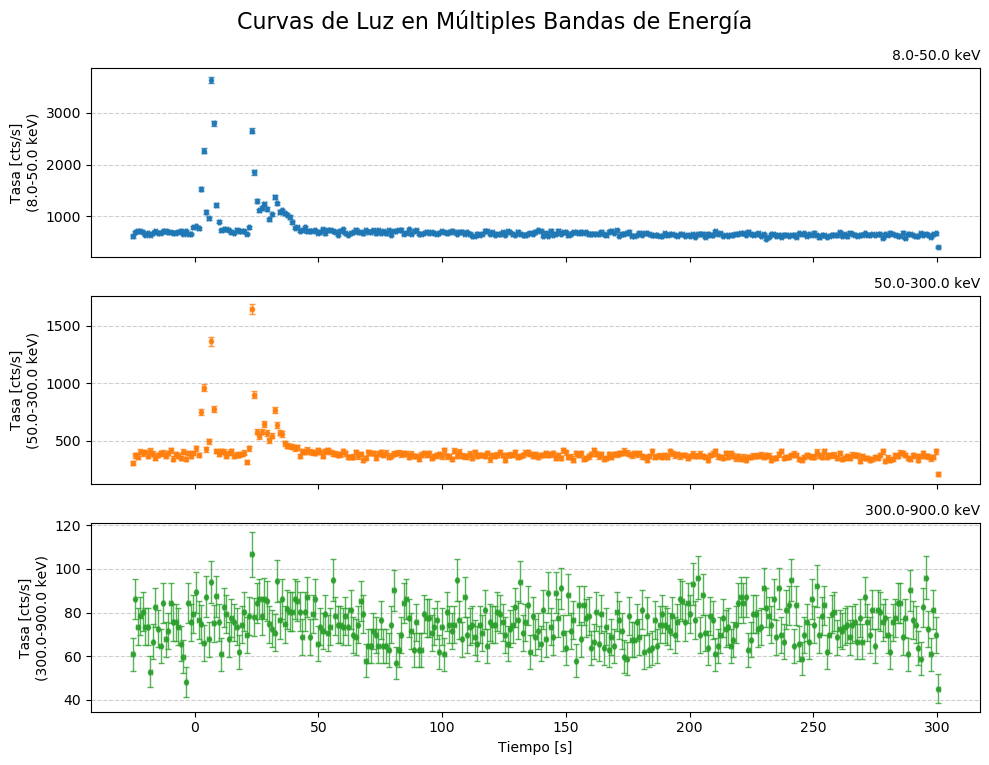

In [12]:
import matplotlib.pyplot as plt
import numpy as np 

# NO importamos Lightcurve de gbm.plot para evitar conflictos
from gbm.plot import Spectrum 

# ###################################################
# 1. Tu Definición y Obtención de Datos
# ###################################################
erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

# Objetos de datos
lc_data1 = phaii.to_lightcurve(energy_range=erange1)
lc_data2 = phaii.to_lightcurve(energy_range=erange2)
lc_data3 = phaii.to_lightcurve(energy_range=erange3)

# ----------------------------------------------------
# 2. Preparar los datos y etiquetas
# ----------------------------------------------------
curvas_data = [
    {'data': lc_data1, 'label': f'{erange1[0]}-{erange1[1]} keV', 'color': 'C0'},
    {'data': lc_data2, 'label': f'{erange2[0]}-{erange2[1]} keV', 'color': 'C1'},
    {'data': lc_data3, 'label': f'{erange3[0]}-{erange3[1]} keV', 'color': 'C2'}
]

# ###################################################
# 3. Graficar con Matplotlib Puro (Usando 'centroids' y 'widths')
# ###################################################

# Crear la figura con 3 subplots que compartan el Eje X (tiempo)
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
fig.suptitle('Curvas de Luz en Múltiples Bandas de Energía', fontsize=16)

for i, item in enumerate(curvas_data):
    ax = axes[i]
    data_obj = item['data']
    etiqueta = item['label']
    color = item['color']
    
    # 1. OBTENER LOS DATOS CLAVE (¡USANDO CENTROIDS Y WIDTHS!)
    # Estos atributos son para la posición media del bin.
    tiempo_mid = data_obj.centroids 
    ancho_bin = data_obj.widths # Ancho de cada bin (para barras de error horizontal)
    tasas = data_obj.rates 
    errores = data_obj.rate_uncertainty 
    
    # 2. Graficar los datos y los errores con Matplotlib.errorbar
    # Usamos errorbar para plotear el punto central y sus incertidumbres
    ax.errorbar(
        tiempo_mid, 
        tasas, 
        yerr=errores, 
        xerr=ancho_bin / 2.0, # El error en X es la mitad del ancho del bin
        fmt='o', # Plotea un punto (círculo) en el centro del bin
        markersize=3,
        capsize=2, 
        color=color,
        alpha=0.8,
        elinewidth=1.0,
        label=etiqueta
    )

    # 3. Configurar el eje
    ax.set_ylabel(f'Tasa [cts/s]\n({etiqueta})')
    ax.set_title(etiqueta, fontsize=10, loc='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
# Asegurarse de que el eje X (solo el inferior) esté etiquetado
axes[-1].set_xlabel('Tiempo [s]')

# Ajustar y mostrar
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()